In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

sns.set(style='white', context='notebook', palette='deep')


### Load and Process Data

In [2]:
train = pd.read_csv("train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# feature
X_train = train.drop(["label"], axis=1)
# label
Y_train = train["label"]

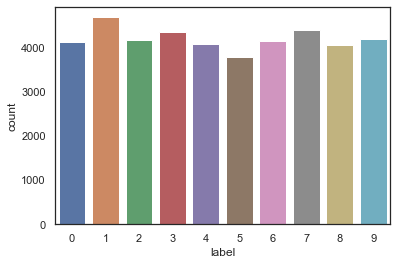

In [5]:
# plot the number of each digital tag
g = sns.countplot(Y_train)

In [6]:
# Normalization
X_train = X_train / 255.0

In [7]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)

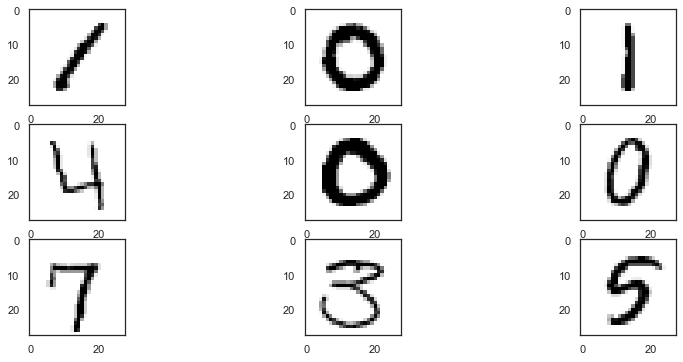

In [8]:
# show examples of the pictures
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(14, 6))

k = 0
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[k][:, :, 0], cmap='binary')
        k += 1

In [9]:
# Encode labels to one hot vectors
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [10]:
# split train set into train set(80%) and validation set(20%)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=0)

### Set model

In [11]:
# cnn model
model = Sequential()
# Convolutional layer1 : 32 of 3×3 filters and 2×2 maxpooling
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
# MaxPooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25)) # prevent overfitting

# Convolutional layer2 : 64 of 3×3 filters and 2×2 maxpooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
# MaxPooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Convert the final feature map into a one-dimensional vector through Flatten
model.add(Flatten())

# Fully-connected (Dense) layer1 with 512
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))

# Fully-connected (Dense) layer2: use softmax activation function to output 10 categories of digital labels
model.add(Dense(10, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

### Set optimizer and annealer

In [13]:
# Use RMSprop optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
# Set learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=3,verbose=1,min_lr=0.00001)

### Data augmentation

In [15]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # Subtract the corresponding mean value of each channel from the input picture
    samplewise_center=False,  # Subtract the average value of samples from each picture to make the average value of each sample 0
    featurewise_std_normalization=False,  # Divide the input by the standard deviation of the dataset
    samplewise_std_normalization=False,  # Divide the sample input by the standard deviation of the dataset
    zca_whitening=False,  # Remove the correlation between samples
    rotation_range=15,  # Randomly rotate the image (0 to 180 degrees)
    zoom_range = 0.15, # Randomly scale the image
    width_shift_range=0.15,   # Randomly move the image horizontally (part of the total width)
    height_shift_range=0.15,  # Vertical random moving image (part of total height)
    horizontal_flip=False,  # Flip the image randomly horizontally
    vertical_flip=False)  # Flip the image vertically and randomly

datagen.fit(X_train)

### Train the model

In [16]:
# Train the model
epochs = 20
batch_size = 128
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(X_val, Y_val),
                              verbose=2, 
                              steps_per_epoch=X_train.shape[0] // batch_size, 
                              callbacks=[learning_rate_reduction])

Epoch 1/20
262/262 - 14s - loss: 0.7344 - accuracy: 0.7581 - val_loss: 0.1555 - val_accuracy: 0.9542 - lr: 0.0010 - 14s/epoch - 53ms/step
Epoch 2/20
262/262 - 13s - loss: 0.2897 - accuracy: 0.9108 - val_loss: 0.0727 - val_accuracy: 0.9788 - lr: 0.0010 - 13s/epoch - 51ms/step
Epoch 3/20
262/262 - 13s - loss: 0.2101 - accuracy: 0.9363 - val_loss: 0.0729 - val_accuracy: 0.9777 - lr: 0.0010 - 13s/epoch - 51ms/step
Epoch 4/20
262/262 - 13s - loss: 0.1693 - accuracy: 0.9467 - val_loss: 0.0521 - val_accuracy: 0.9846 - lr: 0.0010 - 13s/epoch - 51ms/step
Epoch 5/20
262/262 - 13s - loss: 0.1488 - accuracy: 0.9546 - val_loss: 0.0481 - val_accuracy: 0.9854 - lr: 0.0010 - 13s/epoch - 51ms/step
Epoch 6/20
262/262 - 13s - loss: 0.1332 - accuracy: 0.9591 - val_loss: 0.0430 - val_accuracy: 0.9871 - lr: 0.0010 - 13s/epoch - 51ms/step
Epoch 7/20
262/262 - 14s - loss: 0.1238 - accuracy: 0.9631 - val_loss: 0.0423 - val_accuracy: 0.9864 - lr: 0.0010 - 14s/epoch - 52ms/step
Epoch 8/20
262/262 - 14s - loss: 0

### Plot the loss and accuracy curves for train set and validation set 

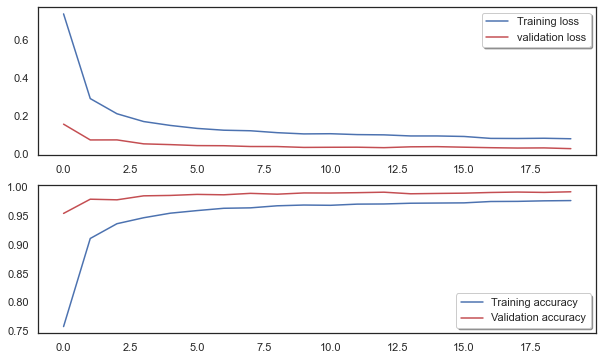

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r',label="validation loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'],color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Plot Confusion matrix

263/263 [==============================] - 1s 4ms/step


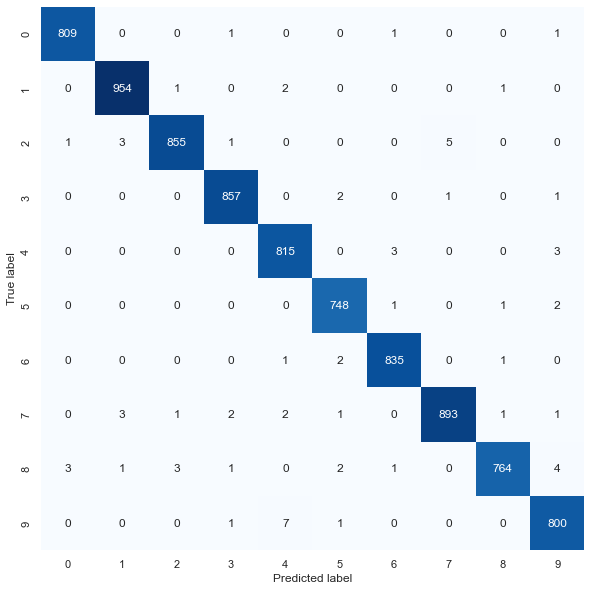

In [18]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

Y_pred = model.predict(X_val) # Predict class probabilities

Y_pred_label = np.argmax(Y_pred, 1) # Find the index of the maximum value in the column direction
Y_true_label = np.argmax(Y_val, 1)

mat = confusion_matrix(Y_true_label,Y_pred_label)
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted label')
plt.ylabel('True label');
plt.show();

### Show the false prediction examples

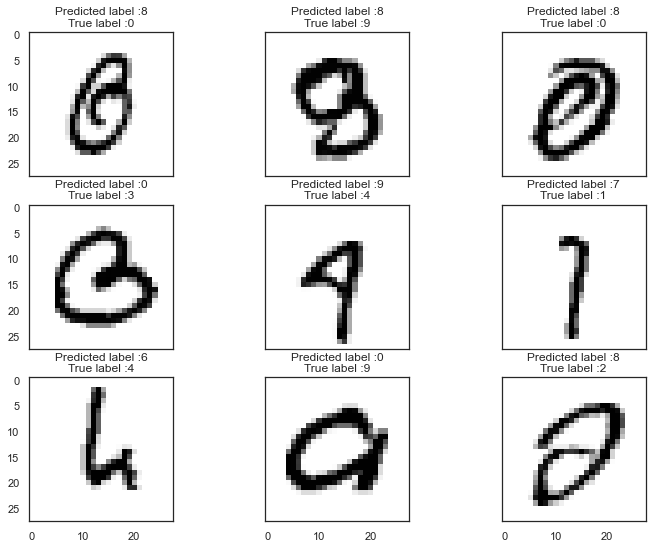

In [19]:
# Show the wrong predictions
errors = (Y_pred_label - Y_true_label != 0)
Y_pred_label_errors = Y_pred_label[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true_label[errors]
X_val_errors = X_val[errors]

# Sort the errors
Y_pred_prob_errors = np.max(Y_pred_errors, axis=1) 
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
sorted_errors = np.argsort(true_prob_errors - Y_pred_prob_errors)
important_errors = sorted_errors[: 9]

# Show examples of the first 9 false predictions
n = 0
fig, ax = plt.subplots(3, 3, figsize=(12, 9), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        error = important_errors[n]
        ax[i, j].imshow((X_val_errors[error]).reshape((28, 28)), cmap='binary')
        ax[i, j].set_title("Predicted label :{}\nTrue label :{}".format(Y_pred_label_errors[error], Y_true_errors[error]))
        n += 1